### Prediction of Heart Failure

In [ ]:
##### Required libraries

In [1]:
#importing necessary libraries
import sklearn.neighbors as ne
import sklearn.tree as tr
import sklearn.linear_model as lm

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import cross_val_score


#### Data Preprocessing

In [2]:
#reading the Dataset
herfail = pd.read_csv(
    "D:/Machinelearning7072/heart_failure_clinical_records_dataset.csv")
print(herfail.columns)
herfail.head(10)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


#Configuring the test and train data from the dataset
X=herfail.drop("DEATH_EVENT",axis=1)
print(X.columns)
print(X.head(5))
y=herfail['DEATH_EVENT']
print(y)


#### Displaying the Death Percentages

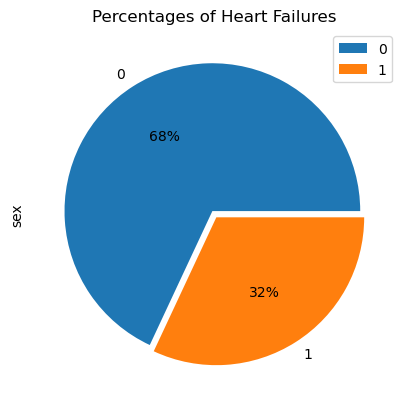

In [3]:
#Heart failure percentages
explode = (0.025,0.025)
herfail.groupby(['DEATH_EVENT']).sum().plot(
    kind = 'pie', y='sex', autopct='%1.0f%%',explode = explode)
plt.title('Percentages of Heart Failures')
plt.show()


#### Configuring and Splitting the data into training and testing data

In [6]:
#Configuring the test and train data from the dataset
X=herfail.drop("DEATH_EVENT",axis=1)
print(X.columns)
print(X.head(5))
y=herfail['DEATH_EVENT']
print(y)

# Train and test data subsets of dataset
X_train, X_test, y_train, y_test = ms.train_test_split(
    X, y, test_size=0.2,random_state=0)
#printing the test and train datsets
print(X_train.head(5),"\n")
print(X_test.head(5),"\n")
print(y_train.head(5),"\n")
print(y_test.head(5),"\n")

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')
   age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75        0                       582         0                 20   
1   55        0                      7861         0                 38   
2   65        0                       146         0                 20   
3   50        1                       111         0                 20   
4   65        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00     

#### Standardizing the data 

In [7]:
#Scaling the Dataset
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))


###### Cross validation for k value

In [10]:
#Finding the best value of k
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = ne.KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=3)
    scores.append(np.mean(score))
print(max(scores))

0.7756228956228957


Text(0.5, 1.0, 'Accuracy scores on different k values')

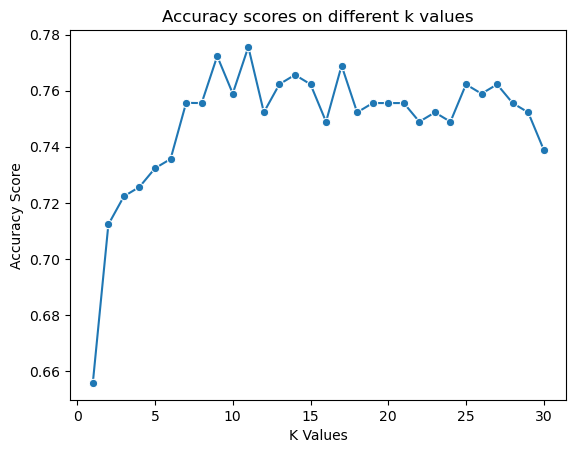

In [11]:
#Plot for k values 
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title('Accuracy scores on different k values')

### Machine Learning Classifications
###### KNN Algorithm

In [12]:
#------------------------------KNN Algorithm-----------------------
KNN=ne.KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train,y_train)
KNN.fit(X_test,y_test)
KNN_pred= KNN.predict(X_test)
trACC_KNN=KNN.score(X_train,y_train)
tesACC_KNN=KNN.score(X_test,y_test)

KNN_accuracy = accuracy_score(y_test, KNN_pred)
print("KNN Accuracy:", KNN_accuracy)


KNN Accuracy: 0.75


In [13]:
#Test and Train Accuracy for KNN
print('Train Accuracy for KNN ',trACC_KNN)
print('Test Accuracy for KNN ', tesACC_KNN,"\n")



Train Accuracy for KNN  0.7782426778242678
Test Accuracy for KNN  0.75 



In [ ]:
#### COnfusion matrix and Classification report

In [14]:
#Confusion matrix
KNN_cf = confusion_matrix(y_test,KNN_pred)
print('confusion matrix for KNN:\n',KNN_cf)

confusion matrix for KNN:
 [[37  0]
 [15  8]]


In [15]:
#Confusion matrix metrics
KNN_matrix = classification_report(y_test,KNN_pred)
print('Classification Report for KNN algorithm:\n',KNN_matrix)


Classification Report for KNN algorithm:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        37
           1       1.00      0.35      0.52        23

    accuracy                           0.75        60
   macro avg       0.86      0.67      0.67        60
weighted avg       0.82      0.75      0.71        60



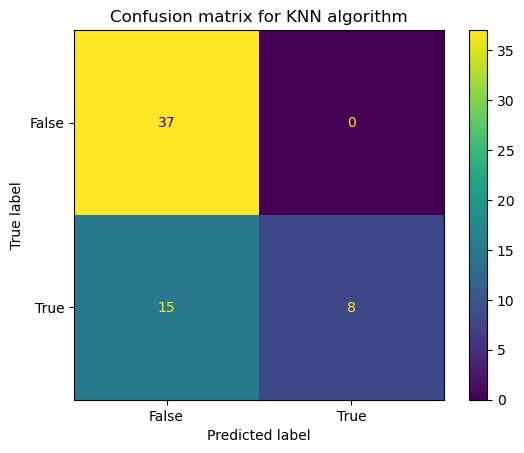

In [16]:
#plotting Confusion matrix 
KNN_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = KNN_cf,display_labels = [False,True])
KNN_cm_display.plot()
plt.title('Confusion matrix for KNN algorithm')
plt.show()


###### Decision Tree

In [21]:
#---------------------------Decision tree-----------------------
#Create a Decision Tree classifier with the current max_depth = 7
#from sklearn import 

DT=tr.DecisionTreeClassifier(max_depth=7)
DT.fit(X_train,y_train)
DT_pred= DT.predict(X_test)
trACC_DT=DT.score(X_train,y_train)
tesACC_DT=DT.score(X_test,y_test)

#Accuracy score
DT_accuracy = accuracy_score(y_test, DT_pred)
print("DT Accuracy:", DT_accuracy)


DT Accuracy: 0.7833333333333333


In [22]:
print('Train Accuracy for Decision Tree=', trACC_DT)
print('Test Accuracy for Decision Tree=', tesACC_DT)


Train Accuracy for Decision Tree= 0.9832635983263598
Test Accuracy for Decision Tree= 0.7833333333333333


In [ ]:
###### Visualization of Decision tree

|--- feature_11 <= -0.73
|   |--- feature_8 <= -0.02
|   |   |--- feature_4 <= 1.74
|   |   |   |--- feature_4 <= 0.86
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.86
|   |   |   |   |--- feature_1 <= 0.11
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.11
|   |   |   |   |   |--- class: 1
|   |   |--- feature_4 >  1.74
|   |   |   |--- class: 0
|   |--- feature_8 >  -0.02
|   |   |--- feature_8 <= 0.63
|   |   |   |--- feature_4 <= -0.90
|   |   |   |   |--- feature_2 <= -0.51
|   |   |   |   |   |--- feature_4 <= -1.34
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  -1.34
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  -0.51
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  -0.90
|   |   |   |   |--- feature_5 <= 0.27
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.27
|   |   |   |   |   |--- feature_4 <= -0.33
|   |   |   |   |   |   |--- class: 0
|   |   | 

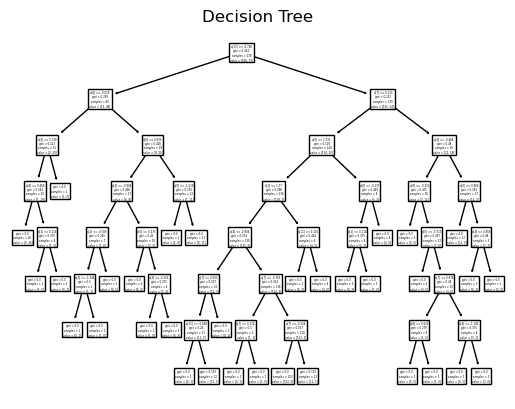

In [23]:
DT_model = DT.fit(X_train,y_train)
text_representation = tr.export_text(DT)
print(text_representation)

# To Visualize Decision Tree
plt.figure()
tr.plot_tree(DT_model)
plt.title('Decision Tree')
plt.show()

In [ ]:
###### Confusion Matrix and Classification report

In [24]:
#Confusion matrix
DT_pred= DT.predict(X_test)
DT_cf = confusion_matrix(y_test,DT_pred)
print('confusion matrix for DT :\n',DT_cf)


confusion matrix for DT :
 [[33  4]
 [ 9 14]]


In [25]:
#Confusion matrix metrics
DT_matrix = classification_report(y_test,DT_pred)
print('Classification Report for Decision Tree:\n',DT_matrix)


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        37
           1       0.78      0.61      0.68        23

    accuracy                           0.78        60
   macro avg       0.78      0.75      0.76        60
weighted avg       0.78      0.78      0.78        60



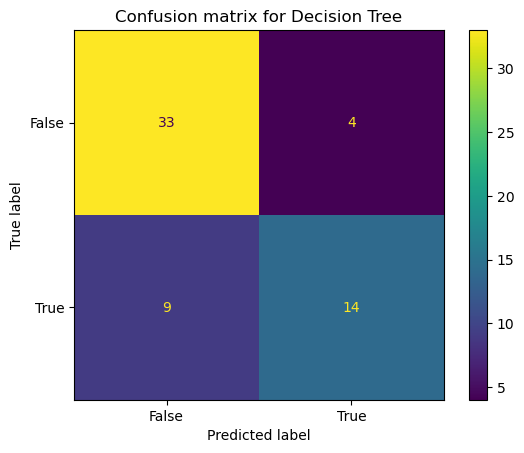

In [26]:
#plotting Confusion matrix 
DT_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = DT_cf,display_labels = [False,True])
DT_cm_display.plot()
plt.title('Confusion matrix for Decision Tree')
plt.show()


##### Logistic Regression

In [27]:
#------------------------------Logistic Regression-----------------------
LR=lm.LogisticRegression()
LR.fit(X_train,y_train)
LR_pred= LR.predict(X_test)
trACC_LR=LR.score(X_train,y_train)
tesACC_LR=LR.score(X_test,y_test)


In [28]:
LR_accuracy = accuracy_score(y_test, LR_pred)
print("LR Accuracy:", LR_accuracy)


LR Accuracy: 0.8


In [29]:
print('Train Accuracy for Logistic Regression : ',trACC_LR)
print('Test Accuracy for Logistic Regression : ', tesACC_LR,"\n")


Train Accuracy for Logistic Regression :  0.8661087866108786
Test Accuracy for Logistic Regression :  0.8 



In [ ]:
####### Confusion matrix and Classification report

In [30]:
#confusion matrix for logistic regression
LR_cf = confusion_matrix(y_test,LR_pred)
print('confusion matrix for LR:\n',LR_cf)


confusion matrix for LR:
 [[37  0]
 [12 11]]


In [31]:
#Confusion matrix metrics
LR_matrix = classification_report(y_test,LR_pred)
print('Classification Report for LR:\n',LR_matrix)


Classification Report for LR:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        37
           1       1.00      0.48      0.65        23

    accuracy                           0.80        60
   macro avg       0.88      0.74      0.75        60
weighted avg       0.85      0.80      0.78        60



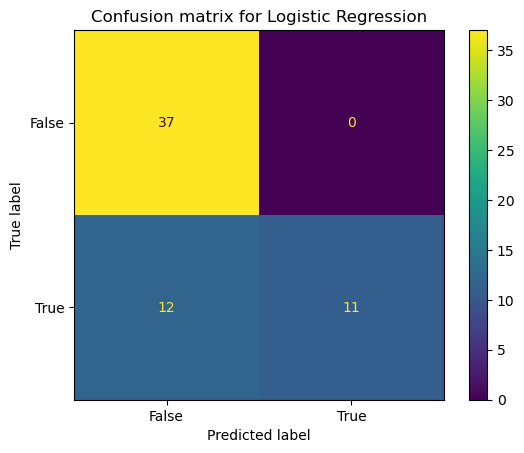

In [32]:
#plotting Confusion matrix 
LR_cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = LR_cf,display_labels = [False,True])
LR_cm_display.plot()
plt.title('Confusion matrix for Logistic Regression')
plt.show()


###### ROC Curve

In [33]:
#---------------------ROC curve-----------------------
#ROC curve for KNN algorithm
KNN_pred_prob = KNN.predict_proba(X_test)
KNN_pred_prob = KNN_pred_prob[:,1]
KNN_fpr,KNN_tpr,_=roc_curve(y_test,KNN_pred_prob)


In [34]:
# ROC curve for Decision Tree
DT_pred_prob = DT.predict_proba(X_test)
DT_pred_prob = DT_pred_prob[:,1]
DT_fpr,DT_tpr,_=roc_curve(y_test,DT_pred_prob)


In [35]:
# ROC for Logistic regression
LR_pred_prob = LR.predict_proba(X_test)
LR_pred_prob = LR_pred_prob[:,1]
LR_fpr,LR_tpr,_=roc_curve(y_test,LR_pred_prob)


In [ ]:
#### Plotting for ROC Curves

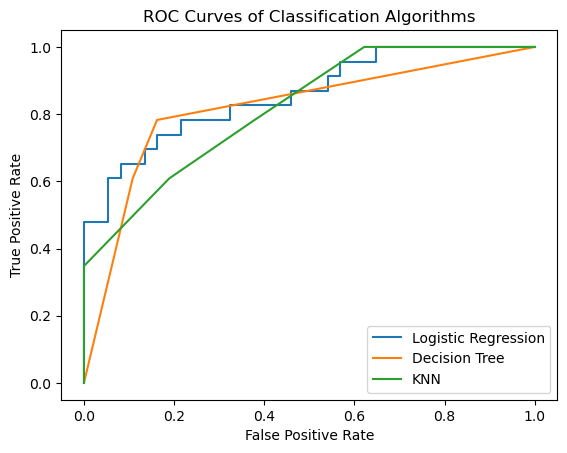

In [36]:
#plotting Roc_curve
plt.figure()
plt.plot(LR_fpr,LR_tpr,label = 'Logistic Regression')
plt.plot(DT_fpr,DT_tpr,label = 'Decision Tree')
plt.plot(KNN_fpr,KNN_tpr,label = 'KNN')
plt.title('ROC Curves of Classification Algorithms')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


#### comparing the accuracies of classifications

In [ ]:
##### accuracies plot

  Name        Acr
0  KNN  75.000000
1   DT  78.333333
2   LR  80.000000


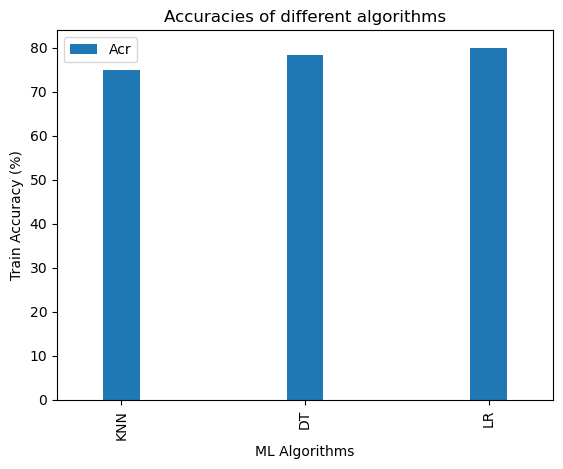

In [37]:
#plot for the different accuracies
data = [['KNN',KNN_accuracy*100],
        ['DT',DT_accuracy*100],
        ['LR',LR_accuracy*100]]
df = pd.DataFrame(data, columns=['Name','Acr'])
print(df)


df.plot.bar(x='Name',y = 'Acr',width = 0.2)
plt.title('Accuracies of different algorithms')
plt.xlabel('ML Algorithms')
plt.ylabel('Train Accuracy (%)')
plt.show()


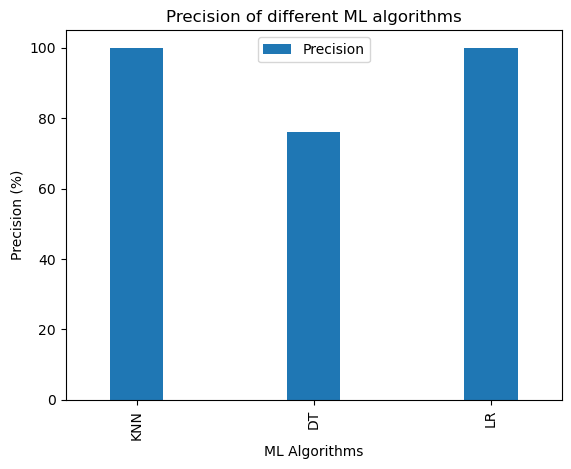

In [38]:
#plot for precision
precision = [['KNN',100,35,52],['DT',76,57,65],['LR',100,48,65]]
df_pre = pd.DataFrame(precision, columns = ['Name','Precision','recall','f1score'])
df_pre.plot.bar(x='Name',y = 'Precision',width = 0.3)
plt.title('Precision of different ML algorithms')
plt.xlabel('ML Algorithms')
plt.ylabel('Precision (%)')
plt.show()




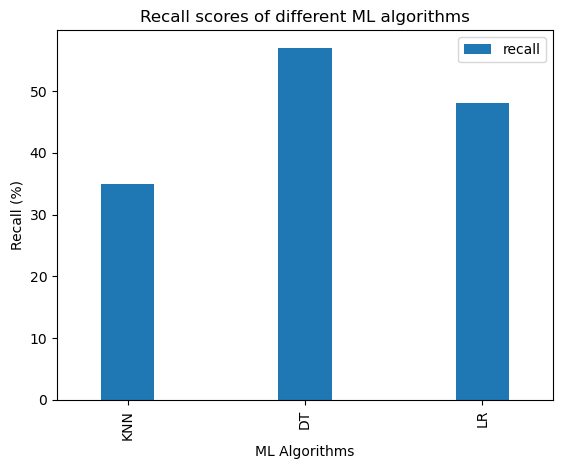

In [39]:
#plot for recall
df_pre.plot.bar(x='Name',y = 'recall',width = 0.3)
plt.title('Recall scores of different ML algorithms')
plt.xlabel('ML Algorithms')
plt.ylabel('Recall (%)')
plt.show()



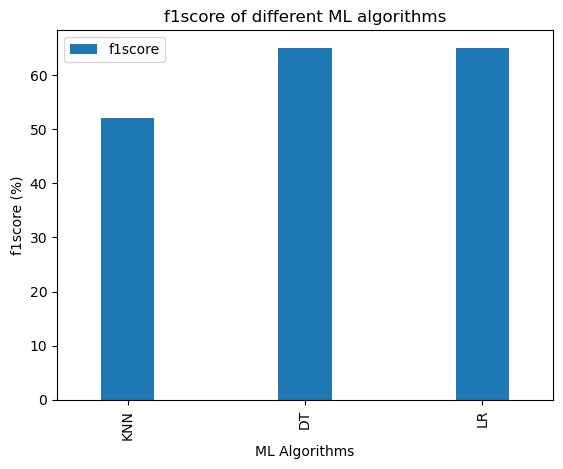

In [40]:
# plot for f1-score
df_pre.plot.bar(x='Name',y = 'f1score',width = 0.3)
plt.title('f1score of different ML algorithms')
plt.xlabel('ML Algorithms')
plt.ylabel('f1score (%)')
plt.show()